# Name: Shreya Sadashiva Kamath
# Github Username: shreyasa
# USC-ID: 7553148882


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import math
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

## a. Downloaded Dataset and Label is mapped to numerical

In [2]:
dataset = pd.read_csv('../data/column_2C.dat', delimiter=' ',names=["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope","pelvic_radius","degree_spondylolisthesis","class"])

In [3]:
dataset['class'] = dataset['class'].map({'NO': 0, 'AB': 1})

In [4]:
dataset

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


## b) Pre-Processing and Exploratory data analysis

### i. Scatter Plots of Independent Variables:

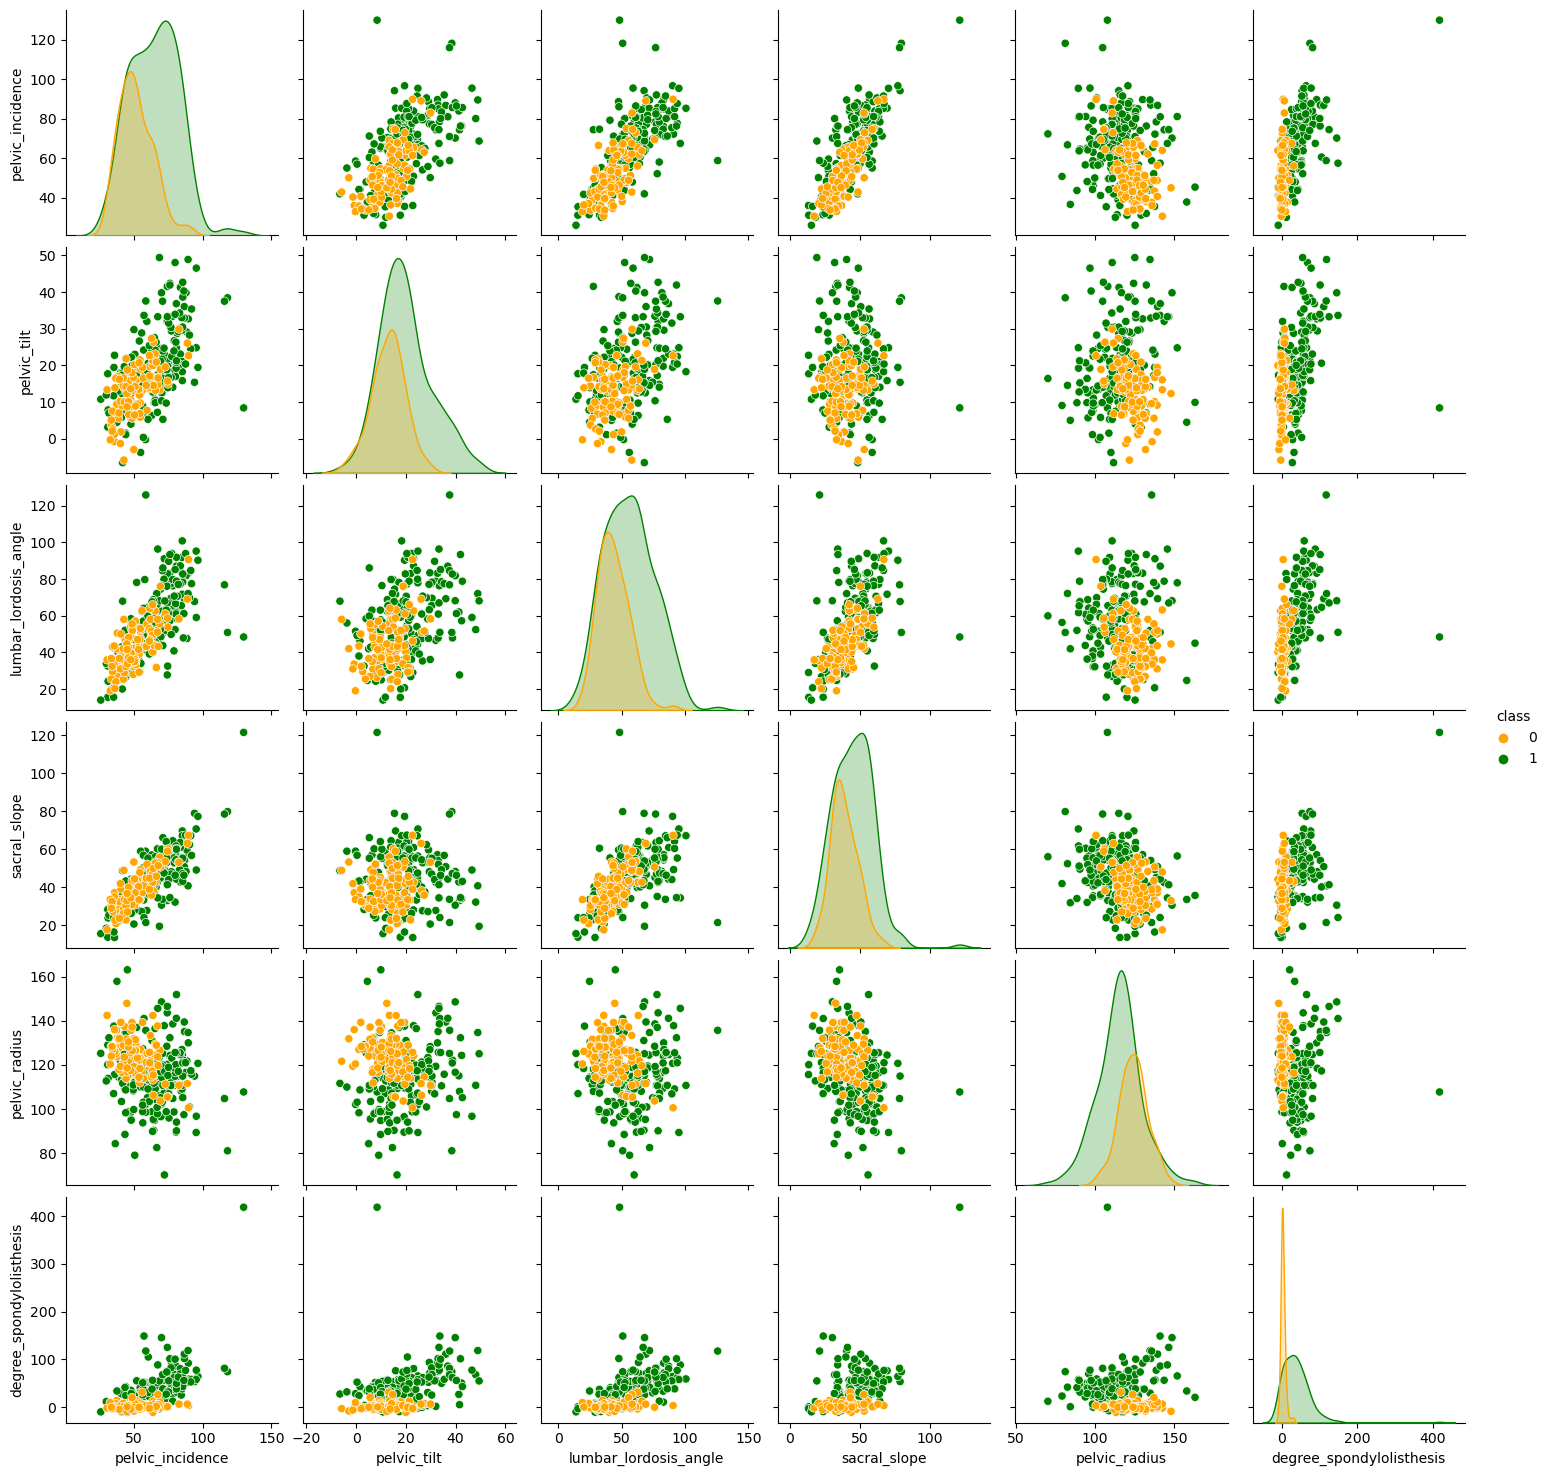

In [5]:
sns.pairplot(data=dataset, hue='class', palette=['orange', 'green'], vars=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'])

### ii. Box Plots of each Independent Variables:

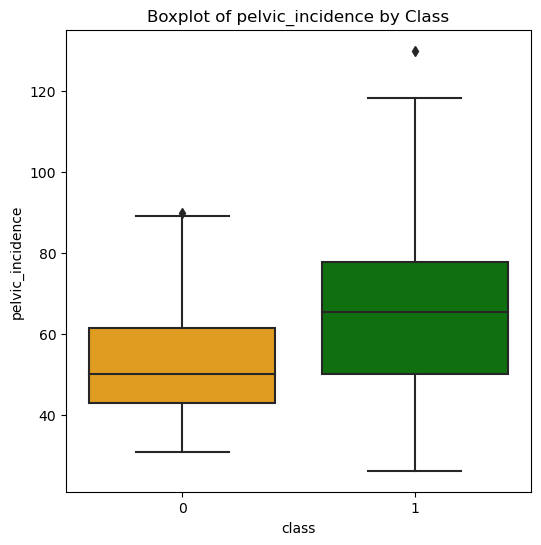

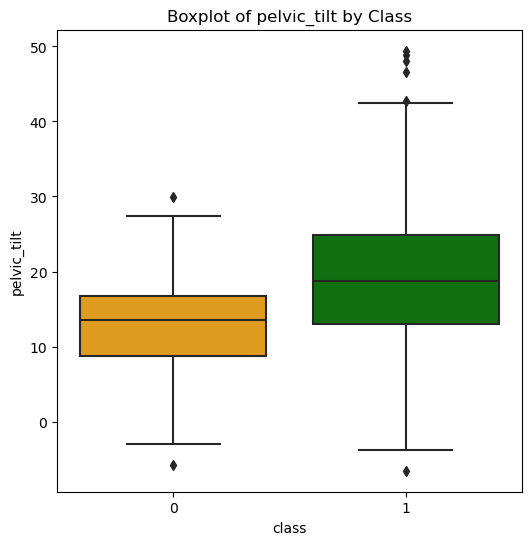

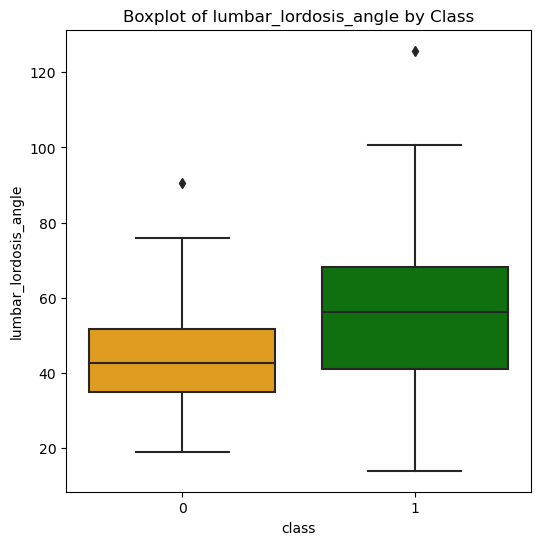

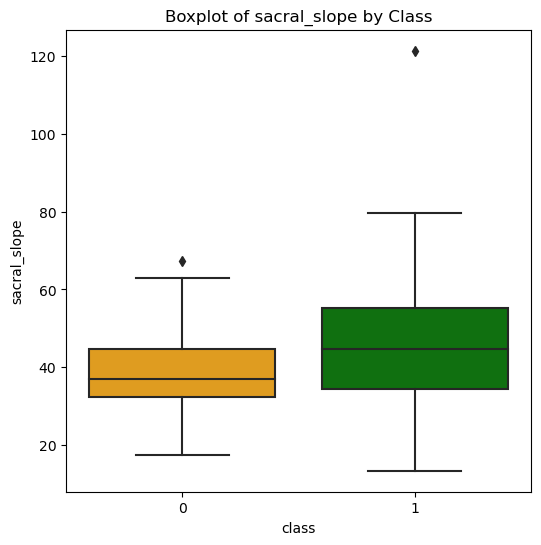

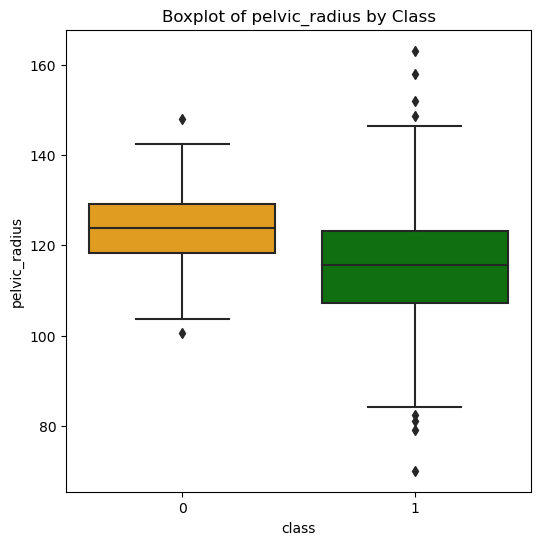

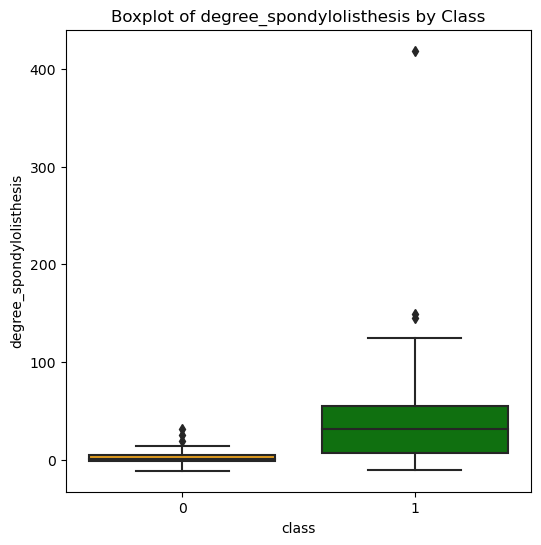

In [6]:
for column in dataset.columns[:-1]:  # Exclude the last column which is 'class'
    plt.figure(figsize=(6, 6)) 
    sns.boxplot(x='class', y=column, data=dataset, palette={0: 'orange', 1: 'green'}) #https://chat.openai.com
    plt.title(f'Boxplot of {column} by Class')
    plt.show()

### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the Training set and rest as Testing set 

In [7]:
#There are 100 Normal and 210 Abnormal
#select 70 rows of class 0  as training set
dataset0_train=dataset[dataset['class']==0].head(70)
#select 140 rows of class 1 as training set
dataset1_train=dataset[dataset['class']==1].head(140)


#select remaining 30 rows of class 0  as testing set
dataset0_test=dataset[dataset['class']==0].tail(30)
#select 70 rows of class 1 as training set
dataset1_test=dataset[dataset['class']==1].tail(70)

In [8]:
training_set=pd.concat([dataset0_train,dataset1_train])
testing_set=pd.concat([dataset0_test,dataset1_test])

In [9]:
#since it is concatenated reseting of the index is required
training_set.reset_index(inplace = True)
testing_set.reset_index(inplace = True)

In [10]:
training_set

,index,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,210,38.51,16.96,35.11,21.54,127.63,7.99,0
1,211,54.92,18.97,51.60,35.95,125.85,2.00,0
2,212,44.36,8.95,46.90,35.42,129.22,4.99,0
3,213,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...,...
205,135,77.12,30.35,77.48,46.77,110.61,82.09,1
206,136,88.02,39.84,81.77,48.18,116.60,56.77,1
207,137,83.40,34.31,78.42,49.09,110.47,49.67,1
208,138,72.05,24.70,79.87,47.35,107.17,56.43,1


In [11]:
testing_set

,index,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,280,50.09,13.43,34.46,36.66,119.13,3.09,0
1,281,64.26,14.50,43.90,49.76,115.39,5.95,0
2,282,53.68,13.45,41.58,40.24,113.91,2.74,0
3,283,49.00,13.11,51.87,35.88,126.40,0.54,0
4,284,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...,...
95,205,80.11,33.94,85.10,46.17,125.59,100.29,1
96,206,95.48,46.55,59.00,48.93,96.68,77.28,1
97,207,74.09,18.82,76.03,55.27,128.41,73.39,1
98,208,87.68,20.37,93.82,67.31,120.94,76.73,1


## c) Classification using KNN on Vertebral Column Data Set

### i. Find k-nearest neighbors with Euclidean metric:

In [12]:
train_X = training_set.loc[:,'pelvic_incidence':'degree_spondylolisthesis']
train_Y = training_set.loc[:,'class']
test_X = testing_set.loc[:,'pelvic_incidence':'degree_spondylolisthesis']
test_Y = testing_set.loc[:,'class']

In [13]:
def kNearestClassifier(k):
    
    knnClassifier = KNeighborsClassifier(n_neighbors = k, p = 2, metric = 'euclidean')
    knnClassifier.fit(train_X, train_Y)
    testPredictedY = knnClassifier.predict(test_X.values)
    trainPredictedY = knnClassifier.predict(train_X.values)
    trainingScoreError = 1 - accuracy_score(train_Y, trainPredictedY)
    testingScoreError = 1 - accuracy_score(test_Y, testPredictedY)
    
    return (trainingScoreError, testingScoreError)

### ii. Training and Testing Errors for different values of k:

In [14]:
trainingErrors = []
testingErrors = []
kValues = []

for k in range(208, 0, -3):
    trainingError, testingError = kNearestClassifier(k)
    trainingErrors.append(trainingError)
    testingErrors.append(testingError)
    kValues.append(k)

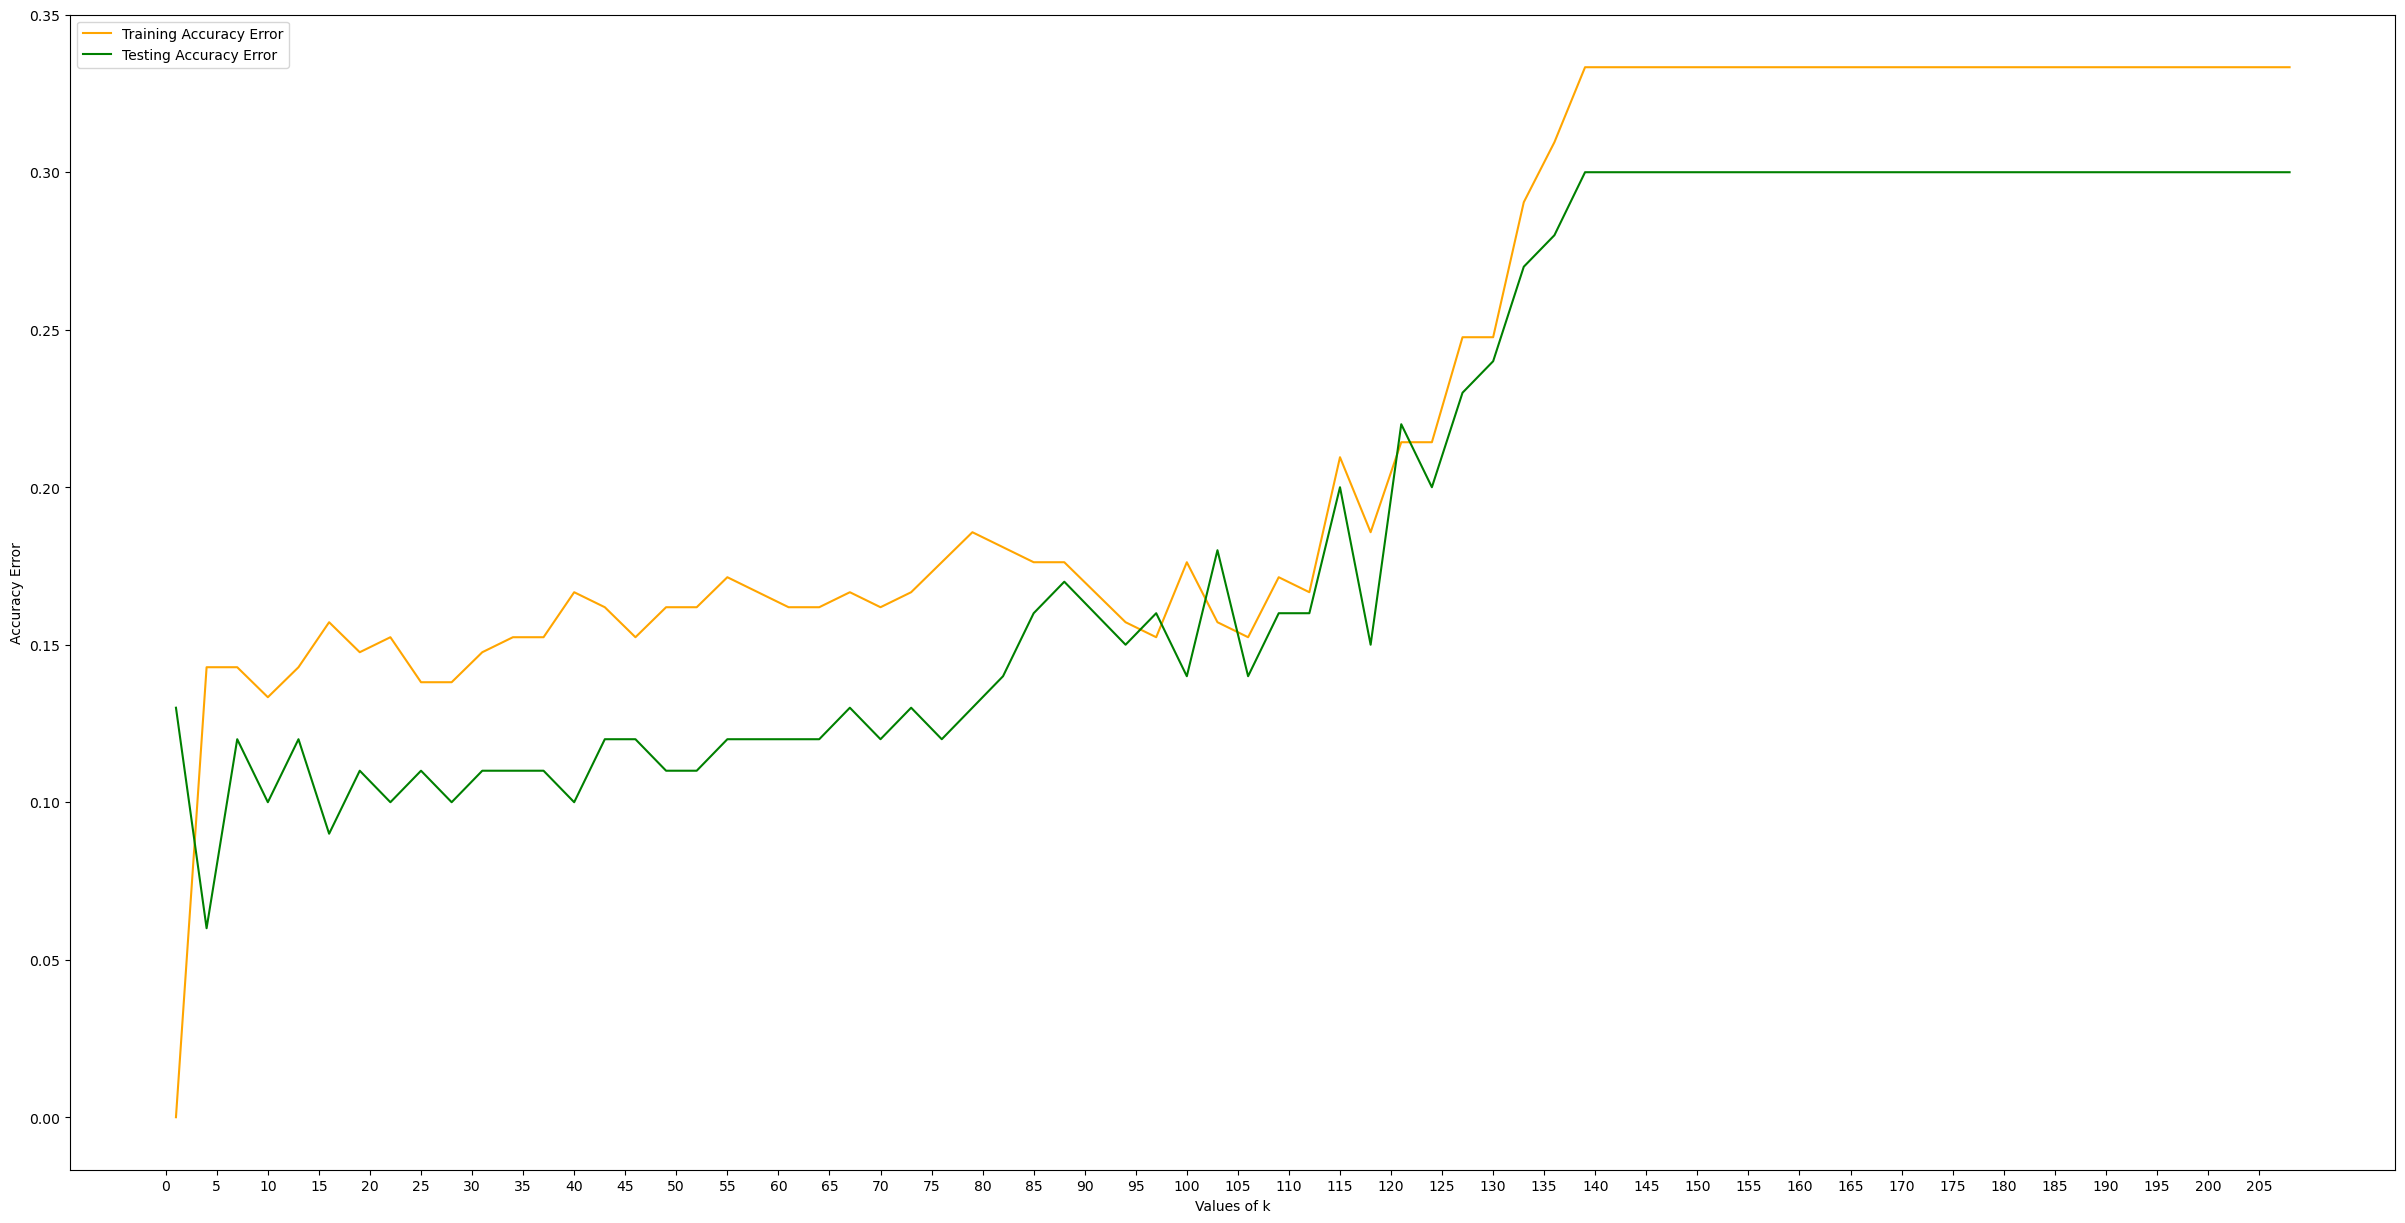

In [15]:
plt.figure(figsize = (30, 15))
plt.plot(kValues, trainingErrors, color = 'orange', label = 'Training Accuracy Error')
plt.plot(kValues, testingErrors, color = 'green', label = 'Testing Accuracy Error')
plt.xticks(np.arange(0, 210, 5))
plt.xlabel('Values of k')
plt.ylabel('Accuracy Error')
plt.legend()

In the above plot, we can see that the accuracy score error is minimum when k is between 1 and 5 approximately. We will run the function again for values 2, 3, 4, and 5 to find the k* which gives minimum accuracy score error.

In [16]:
print('Values of k: Accuracy\n')
for k in range(1,6):
    
    print(str(k) + ": " + str(1 - kNearestClassifier(k)[1]))

Values of k: Accuracy

1: 0.87
2: 0.9
3: 0.92
4: 0.94
5: 0.9


k=4 has the highest accuracy so for further calculations of the confusion matrix we will use k value as 4.

In [17]:
knn = KNeighborsClassifier(n_neighbors = 4, p = 2, metric = 'euclidean')
knn.fit(train_X, train_Y)
yPredictedScores = knn.predict(test_X)
testingAccuracy = metrics.accuracy_score(test_Y, yPredictedScores)

In [18]:
confusionMatrix = metrics.confusion_matrix(test_Y, yPredictedScores)
TP = confusionMatrix[1, 1]
TN = confusionMatrix[0, 0]
FP = confusionMatrix[0, 1]
FN = confusionMatrix[1, 0]

print('Confusion Matrix: ')
print(confusionMatrix)

print('\n\nTrue Positive Rate: ')
print(TP / (TP + FN))

print('\n\nTrue Negative Rate: ')
print(TN / (TN + FP))

recall = TP / (TP + FN)
print('\n\nPrecision: ')
precision = TP / (TP + FP)
print(precision)

print('\n\nF1-Score: ')
print(2 * (recall * precision) / (recall + precision))

Confusion Matrix: 
[[25  5]
 [ 1 69]]


True Positive Rate: 
0.9857142857142858


True Negative Rate: 
0.8333333333333334


Precision: 
0.9324324324324325


F1-Score: 
0.9583333333333333


### iii. Best Error Rate:

In [19]:
nValues = []
for n in range(10, 211, 10):
    nValues.append(n)

def kNearestClassifierforN(n, trainingX, trainingY, testingX, testingY):
    
    knn = KNeighborsClassifier(n_neighbors = n, p = 2, metric = 'minkowski')
    knn.fit(trainingX, trainingY)
    yPredictions = knn.predict(testingX.values)
    accuracy = accuracy_score(testingY, yPredictions)
    error = 1 - accuracy
    return error

In [20]:
minKs = []
minErrors = []
dataset1 = dataset[dataset['class'] == 0].head(70)
dataset2 = dataset[dataset['class'] == 1].head(140)

for n in nValues:
    
    print("---------------------------------------------------------------------------------------------------")
    first = dataset1.head(n // 3)
    second = dataset2.head(2 * n // 3)
    
    newTrainingData = pd.concat([first, second], axis = 0)
    newTrainingData.reset_index(inplace = True)
    newTrainingData = newTrainingData.loc[:, 'pelvic_incidence' : 'class']
    xTrain = newTrainingData.loc[:, 'pelvic_incidence' : 'degree_spondylolisthesis']
    yTrain = newTrainingData.loc[:, 'class']
    
    minK, minError = None, 2
    errorDict = {}
    for k in range(1, n, 5):
        
        error = kNearestClassifierforN(k, xTrain, yTrain, test_X, test_Y)
        errorDict[k] = error
        if error < minError:
            minK = k
            minError = error
    
    print(errorDict)
    print("\nWhen N = " + str(n) + " the best test error rate we get is " + str(minError) + " for k = " + str(minK))
    minErrors.append(minError)

---------------------------------------------------------------------------------------------------
{1: 0.24, 6: 0.26}

When N = 10 the best test error rate we get is 0.24 for k = 1
---------------------------------------------------------------------------------------------------
{1: 0.21999999999999997, 6: 0.18999999999999995, 11: 0.28, 16: 0.30000000000000004}

When N = 20 the best test error rate we get is 0.18999999999999995 for k = 6
---------------------------------------------------------------------------------------------------
{1: 0.21999999999999997, 6: 0.24, 11: 0.26, 16: 0.26, 21: 0.30000000000000004, 26: 0.30000000000000004}

When N = 30 the best test error rate we get is 0.21999999999999997 for k = 1
---------------------------------------------------------------------------------------------------
{1: 0.76, 6: 0.30000000000000004, 11: 0.25, 16: 0.26, 21: 0.30000000000000004, 26: 0.30000000000000004, 31: 0.30000000000000004, 36: 0.30000000000000004}

When N = 40 the bes

{1: 0.14, 6: 0.13, 11: 0.13, 16: 0.13, 21: 0.13, 26: 0.14, 31: 0.14, 36: 0.14, 41: 0.18000000000000005, 46: 0.15000000000000002, 51: 0.18000000000000005, 56: 0.17000000000000004, 61: 0.19999999999999996, 66: 0.20999999999999996, 71: 0.24, 76: 0.25, 81: 0.26, 86: 0.26, 91: 0.27, 96: 0.28, 101: 0.30000000000000004, 106: 0.30000000000000004, 111: 0.30000000000000004, 116: 0.30000000000000004, 121: 0.30000000000000004, 126: 0.30000000000000004, 131: 0.30000000000000004, 136: 0.30000000000000004, 141: 0.30000000000000004, 146: 0.30000000000000004, 151: 0.30000000000000004, 156: 0.30000000000000004, 161: 0.30000000000000004, 166: 0.30000000000000004}

When N = 170 the best test error rate we get is 0.13 for k = 6
---------------------------------------------------------------------------------------------------
{1: 0.14, 6: 0.09999999999999998, 11: 0.12, 16: 0.09999999999999998, 21: 0.10999999999999999, 26: 0.12, 31: 0.12, 36: 0.12, 41: 0.14, 46: 0.10999999999999999, 51: 0.15000000000000002,

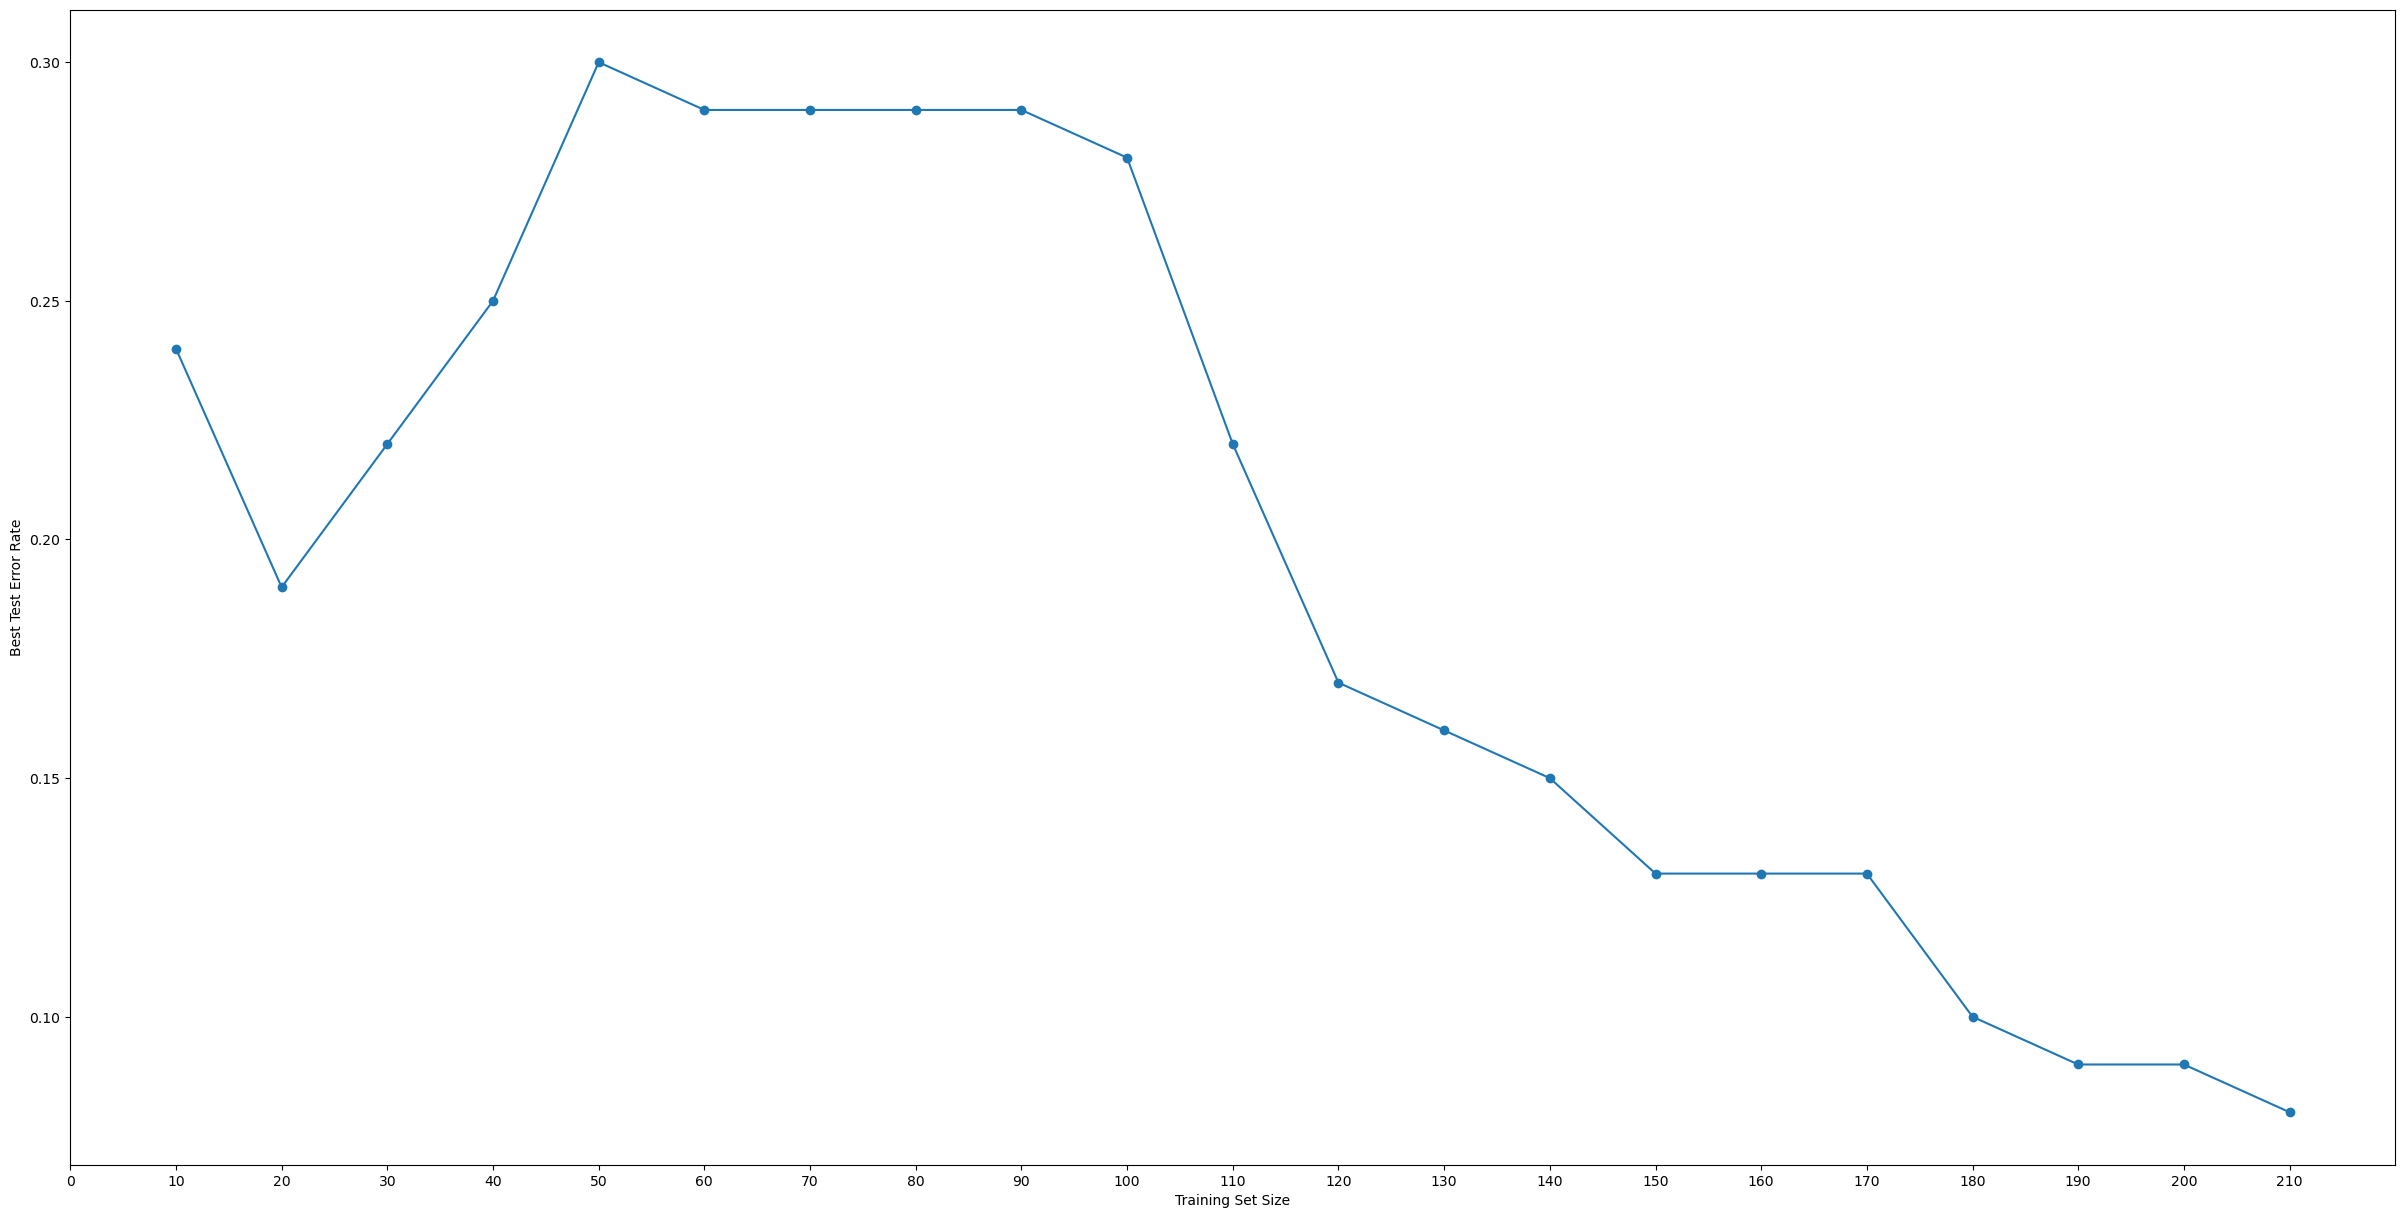

In [22]:
plt.figure(figsize = (30, 15))
plt.plot(nValues, minErrors, marker = 'o')
plt.xticks(np.arange(0, 220, 10)) 
plt.xlabel('Training Set Size')
plt.ylabel('Best Test Error Rate')
plt.show()

## d) Usage of Different Metrics

### i. A. Manhattan Distance as a Metric(p=1): 

In [23]:
def knnManhattan(n):
    
    knn = KNeighborsClassifier(n_neighbors = n, p = 1, metric = 'manhattan')
    knn.fit(train_X, train_Y)
    yPredictedScores = knn.predict(test_X.values)
    testScore = accuracy_score(test_Y, yPredictedScores)
    error = 1 - testScore
    
    return error

minK, minError = None, 1
errors = []
for k in range(1, 197, 5):
    err = knnManhattan(k)
    errors.append([k, err])
    if err <= minError:
        minK = k
        minError = err 

print("The errors for all the values of k are:")
print(errors)
print("\nUsing the Manhattan distance as a metric the test error rate is", minError, "when k is", minK)

The errors for all the values of k are:
[[1, 0.12], [6, 0.10999999999999999], [11, 0.10999999999999999], [16, 0.12], [21, 0.12], [26, 0.10999999999999999], [31, 0.12], [36, 0.13], [41, 0.13], [46, 0.13], [51, 0.14], [56, 0.13], [61, 0.15000000000000002], [66, 0.15000000000000002], [71, 0.14], [76, 0.14], [81, 0.16000000000000003], [86, 0.15000000000000002], [91, 0.19999999999999996], [96, 0.19999999999999996], [101, 0.21999999999999997], [106, 0.20999999999999996], [111, 0.22999999999999998], [116, 0.20999999999999996], [121, 0.21999999999999997], [126, 0.24], [131, 0.28], [136, 0.28], [141, 0.30000000000000004], [146, 0.30000000000000004], [151, 0.30000000000000004], [156, 0.30000000000000004], [161, 0.30000000000000004], [166, 0.30000000000000004], [171, 0.30000000000000004], [176, 0.30000000000000004], [181, 0.30000000000000004], [186, 0.30000000000000004], [191, 0.30000000000000004], [196, 0.30000000000000004]]

Using the Manhattan distance as a metric the test error rate is 0.1099

### i. B. Using log10(p) Values:

In [21]:
def knnWithPvalues(p):
    
    knn = KNeighborsClassifier(n_neighbors = minK, p = p)
    knn.fit(train_X, train_Y)
    yPredictedScores = knn.predict(test_X.values)
    testScore = accuracy_score(test_Y, yPredictedScores)
    error = 1 - testScore
    
    return error

minP, minError = None, 1
errors = []
for logp in np.arange(0.1, 1.1, 0.1):
    p = 10 ** logp
    err = knnWithPvalues(p)
    errors.append([logp, err])
    if err <= minError:
        minP = logp
        minError = err

print("The errors for all the values of logp are:")
print(errors)
print("\nUsing the Manhattan distance as a metric the test error rate is", minError, "when logp is", minP)


The errors for all the values of logp are:
[[0.1, 0.08999999999999997], [0.2, 0.08999999999999997], [0.30000000000000004, 0.07999999999999996], [0.4, 0.07999999999999996], [0.5, 0.07999999999999996], [0.6, 0.06000000000000005], [0.7000000000000001, 0.06999999999999995], [0.8, 0.07999999999999996], [0.9, 0.08999999999999997], [1.0, 0.08999999999999997]]

Using the Manhattan distance as a metric the test error rate is 0.06000000000000005 when logp is 0.6


### i. C. Usage of Chebyshev Distance as a Metric:

In [22]:
def knnChebyshev(n):
    
    knn = KNeighborsClassifier(n_neighbors = n, metric = 'chebyshev')
    knn.fit(train_X, train_Y)
    yPredictedScores = knn.predict(test_X.values)
    testScore = accuracy_score(test_Y, yPredictedScores)
    error = 1 - testScore
    
    return error

minK, minError = None, 1
errors = []
for k in range(1, 197, 5):
    err = knnChebyshev(k)
    errors.append([k, err])
    if err <= minError:
        minK = k
        minError = err

print("The errors for all the values of k are:")
print(errors)
print("\nUsing the Chebyshev distance as a metric the test error rate is", minError, "when k is", minK)

The errors for all the values of k are:
[[1, 0.13], [6, 0.09999999999999998], [11, 0.12], [16, 0.07999999999999996], [21, 0.10999999999999999], [26, 0.12], [31, 0.12], [36, 0.09999999999999998], [41, 0.13], [46, 0.12], [51, 0.12], [56, 0.12], [61, 0.14], [66, 0.13], [71, 0.14], [76, 0.10999999999999999], [81, 0.14], [86, 0.12], [91, 0.15000000000000002], [96, 0.14], [101, 0.18999999999999995], [106, 0.18000000000000005], [111, 0.18000000000000005], [116, 0.18999999999999995], [121, 0.20999999999999996], [126, 0.20999999999999996], [131, 0.25], [136, 0.28], [141, 0.30000000000000004], [146, 0.30000000000000004], [151, 0.30000000000000004], [156, 0.30000000000000004], [161, 0.30000000000000004], [166, 0.30000000000000004], [171, 0.30000000000000004], [176, 0.30000000000000004], [181, 0.30000000000000004], [186, 0.30000000000000004], [191, 0.30000000000000004], [196, 0.30000000000000004]]

Using the Chebyshev distance as a metric the test error rate is 0.07999999999999996 when k is 16


### ii. Using Mahalanobis Distance as a Metric:

In [23]:
def knnMahalanobis(n):
    
    knn = KNeighborsClassifier(n_neighbors = n, metric = 'mahalanobis', metric_params = {'VI': np.linalg.pinv(np.cov(train_X, rowvar = False))}, algorithm = 'brute')
    knn.fit(train_X, train_Y)
    yPredictedScores = knn.predict(test_X.values)
    testScore = accuracy_score(test_Y, yPredictedScores)
    error = 1 - testScore
    
    return error

minK, minError = None, 1
errors = []
for k in range(1, 197, 5):
    err = knnMahalanobis(k)
    errors.append([k, err])
    if err < minError:
        minK = k
        minError = err

    
print("The errors for all the values of k are:")
print(errors)
print("\nUsing the Mahanalobis distance as a metric the test error rate is", minError, "when k is", minK)

The errors for all the values of k are:
[[1, 0.17000000000000004], [6, 0.17000000000000004], [11, 0.19999999999999996], [16, 0.19999999999999996], [21, 0.20999999999999996], [26, 0.19999999999999996], [31, 0.22999999999999998], [36, 0.20999999999999996], [41, 0.24], [46, 0.24], [51, 0.24], [56, 0.26], [61, 0.25], [66, 0.27], [71, 0.26], [76, 0.25], [81, 0.24], [86, 0.26], [91, 0.26], [96, 0.26], [101, 0.28], [106, 0.28], [111, 0.31000000000000005], [116, 0.29000000000000004], [121, 0.30000000000000004], [126, 0.30000000000000004], [131, 0.30000000000000004], [136, 0.30000000000000004], [141, 0.30000000000000004], [146, 0.30000000000000004], [151, 0.30000000000000004], [156, 0.30000000000000004], [161, 0.30000000000000004], [166, 0.30000000000000004], [171, 0.30000000000000004], [176, 0.30000000000000004], [181, 0.30000000000000004], [186, 0.30000000000000004], [191, 0.30000000000000004], [196, 0.30000000000000004]]

Using the Mahanalobis distance as a metric the test error rate is 0.17

In [24]:
header = ["Type of KNN used", "Best test error rate", "k* value"]
data = [["Manhattan Distance(p = 1)", "0.10999999999999999", "26"], ["KNN with best log10(p) value 1.0", "0.08999999999999997", "26"], ["Chebyshev Distance", "0.07999999999999996", "16"], ["Mahanalobis Distance", "0.17000000000000004", "1"]]
table = tabulate(data, headers = header, tablefmt = "fancy_outline")
print(table)

╒══════════════════════════════════╤════════════════════════╤════════════╕
│ Type of KNN used                 │   Best test error rate │   k* value │
╞══════════════════════════════════╪════════════════════════╪════════════╡
│ Manhattan Distance(p = 1)        │                   0.11 │         26 │
│ KNN with best log10(p) value 1.0 │                   0.09 │         26 │
│ Chebyshev Distance               │                   0.08 │         16 │
│ Mahanalobis Distance             │                   0.17 │          1 │
╘══════════════════════════════════╧════════════════════════╧════════════╛


## e) Weighted Decision Voting

### Weighted KNN with Eucliean Distance:

In [25]:
def knnEucDist(n):
    
    knn = KNeighborsClassifier(n_neighbors = n, p = 2, weights = 'distance', metric = 'euclidean')
    knn.fit(train_X, train_Y)
    yPredictedValues = knn.predict(test_X.values)
    score = accuracy_score(test_Y, yPredictedValues)
    error = 1 - score
    
    return error

errors = []
minK, minError = None, 1
for k in range(1, 197, 5):
    err = knnEucDist(k)
    errors.append([k, err])
    if err <= minError:
        minK = k
        minError = err

print("The errors for all the values of k are:")
print(errors)
print("\nUsing the Euclidean distance weighted KNN the test error rate is", minError, "when k is", minK)

The errors for all the values of k are:
[[1, 0.13], [6, 0.09999999999999998], [11, 0.12], [16, 0.10999999999999999], [21, 0.10999999999999999], [26, 0.10999999999999999], [31, 0.10999999999999999], [36, 0.10999999999999999], [41, 0.10999999999999999], [46, 0.10999999999999999], [51, 0.10999999999999999], [56, 0.10999999999999999], [61, 0.10999999999999999], [66, 0.10999999999999999], [71, 0.10999999999999999], [76, 0.12], [81, 0.13], [86, 0.13], [91, 0.14], [96, 0.14], [101, 0.12], [106, 0.14], [111, 0.14], [116, 0.13], [121, 0.13], [126, 0.13], [131, 0.14], [136, 0.14], [141, 0.17000000000000004], [146, 0.18999999999999995], [151, 0.18999999999999995], [156, 0.19999999999999996], [161, 0.22999999999999998], [166, 0.25], [171, 0.27], [176, 0.27], [181, 0.27], [186, 0.27], [191, 0.28], [196, 0.28]]

Using the Euclidean distance weighted KNN the test error rate is 0.09999999999999998 when k is 6


### Weighted KNN with Manhattan Distance:

In [26]:
def knnManDist(n):
    
    knn = KNeighborsClassifier(n_neighbors = n, p = 1, weights = 'distance', metric = 'manhattan')
    knn.fit(train_X, train_Y)
    yPredictedValues = knn.predict(test_X.values)
    score = accuracy_score(test_Y, yPredictedValues)
    error = 1 - score
    
    return error

errors = []
minK, minError = None, 1
for k in range(1, 197, 5):
    err = knnManDist(k)
    errors.append([k, err])
    if err <= minError:
        minK = k
        minError = err

print("The errors for all the values of k are:")
print(errors)
print("\nUsing the Manhattan distance weighted KNN the test error rate is", minError, "when k is", minK)

The errors for all the values of k are:
[[1, 0.12], [6, 0.10999999999999999], [11, 0.10999999999999999], [16, 0.12], [21, 0.10999999999999999], [26, 0.09999999999999998], [31, 0.10999999999999999], [36, 0.10999999999999999], [41, 0.10999999999999999], [46, 0.10999999999999999], [51, 0.12], [56, 0.12], [61, 0.13], [66, 0.13], [71, 0.10999999999999999], [76, 0.12], [81, 0.14], [86, 0.14], [91, 0.13], [96, 0.13], [101, 0.15000000000000002], [106, 0.15000000000000002], [111, 0.15000000000000002], [116, 0.15000000000000002], [121, 0.15000000000000002], [126, 0.15000000000000002], [131, 0.15000000000000002], [136, 0.16000000000000003], [141, 0.17000000000000004], [146, 0.18000000000000005], [151, 0.18999999999999995], [156, 0.20999999999999996], [161, 0.24], [166, 0.25], [171, 0.27], [176, 0.27], [181, 0.27], [186, 0.27], [191, 0.28], [196, 0.29000000000000004]]

Using the Manhattan distance weighted KNN the test error rate is 0.09999999999999998 when k is 26


### Weighted KNN with Chebyshev Distance: 

In [27]:
def knnChebDist(n):
    
    knn = KNeighborsClassifier(n_neighbors = n, weights = 'distance', metric = 'chebyshev')
    knn.fit(train_X, train_Y)
    yPredictedValues = knn.predict(test_X.values)
    score = accuracy_score(test_Y, yPredictedValues)
    error = 1 - score
    
    return error

errors = []
minK, minError = None, 1
for k in range(1, 197, 5):
    err = knnChebDist(k)
    errors.append([k, err])
    if err < minError:
        minK = k
        minError = err

print("The errors for all the values of k are:")
print(errors)
print("\nUsing the Chebyshev distance weighted KNN the test error rate is", minError, "when k is", minK)

The errors for all the values of k are:
[[1, 0.13], [6, 0.13], [11, 0.12], [16, 0.10999999999999999], [21, 0.12], [26, 0.12], [31, 0.10999999999999999], [36, 0.10999999999999999], [41, 0.10999999999999999], [46, 0.12], [51, 0.12], [56, 0.12], [61, 0.10999999999999999], [66, 0.13], [71, 0.12], [76, 0.12], [81, 0.12], [86, 0.14], [91, 0.13], [96, 0.14], [101, 0.14], [106, 0.14], [111, 0.14], [116, 0.14], [121, 0.15000000000000002], [126, 0.14], [131, 0.16000000000000003], [136, 0.16000000000000003], [141, 0.18000000000000005], [146, 0.18999999999999995], [151, 0.20999999999999996], [156, 0.20999999999999996], [161, 0.22999999999999998], [166, 0.26], [171, 0.26], [176, 0.26], [181, 0.27], [186, 0.27], [191, 0.27], [196, 0.28]]

Using the Chebyshev distance weighted KNN the test error rate is 0.10999999999999999 when k is 16


##  f) Lowest Training Error

In [28]:
def knnEucDist(n):
    
    knn = KNeighborsClassifier(n_neighbors = n, p = 2, metric = 'minkowski')
    knn.fit(train_X, train_Y)
    yPredictedValues = knn.predict(test_X.values)
    score = accuracy_score(test_Y, yPredictedValues)
    error = 1 - score
    
    return error

errors = []
minK, minError = None, 1
for k in range(1, 197, 5):
    err = knnEucDist(k)
    errors.append([k, err])
    if err <= minError:
        minK = k
        minError = err

print("The errors for all the values of k are:")
print(errors)
print("\nThe best training error rate we achieved is", minError, "when k is", minK) 

The errors for all the values of k are:
[[1, 0.13], [6, 0.07999999999999996], [11, 0.12], [16, 0.08999999999999997], [21, 0.09999999999999998], [26, 0.10999999999999999], [31, 0.10999999999999999], [36, 0.10999999999999999], [41, 0.10999999999999999], [46, 0.12], [51, 0.10999999999999999], [56, 0.12], [61, 0.12], [66, 0.13], [71, 0.13], [76, 0.12], [81, 0.13], [86, 0.16000000000000003], [91, 0.16000000000000003], [96, 0.15000000000000002], [101, 0.17000000000000004], [106, 0.14], [111, 0.17000000000000004], [116, 0.18000000000000005], [121, 0.21999999999999997], [126, 0.20999999999999996], [131, 0.26], [136, 0.28], [141, 0.30000000000000004], [146, 0.30000000000000004], [151, 0.30000000000000004], [156, 0.30000000000000004], [161, 0.30000000000000004], [166, 0.30000000000000004], [171, 0.30000000000000004], [176, 0.30000000000000004], [181, 0.30000000000000004], [186, 0.30000000000000004], [191, 0.30000000000000004], [196, 0.30000000000000004]]

The best training error rate we achieved